<a href="https://colab.research.google.com/github/kulakovand/colabr_epo/blob/main/_%22%D0%9B%D0%B0%D0%B1%D0%B0_4_1_1(_%D0%BC%D0%BE%D1%8F_7_%D0%B7%D0%BD%D0%B0%D1%87%D0%B5%D0%BD%D0%B8%D0%B9)%22_ipynb%22_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
import pandas as pd
from google.colab import files
file = files.upload()


Saving train.csv to train.csv


In [5]:
training_set = pd.read_csv("train.csv", header=0)

In [6]:
training_set = training_set.dropna() 

In [7]:
training_set.head(5)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
0,ISIC_0000000,-1,female,55.0,anterior torso,NV,benign,0,4,1022,767
1,ISIC_0000001,-1,female,30.0,anterior torso,NV,benign,0,18,1022,767
2,ISIC_0000002,-1,female,60.0,upper extremity,MEL,malignant,1,0,1022,767
3,ISIC_0000003,-1,male,30.0,upper extremity,NV,benign,0,24,1022,767
4,ISIC_0000004,-1,male,80.0,posterior torso,MEL,malignant,1,14,1022,767


In [8]:
training_set.tail(5)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target,tfrecord,width,height
25326,ISIC_0073247,-1,female,85.0,head/neck,BCC,benign,0,19,1024,1024
25327,ISIC_0073248,-1,male,65.0,anterior torso,BKL,benign,0,7,1024,1024
25328,ISIC_0073249,-1,male,70.0,lower extremity,MEL,malignant,1,9,1024,1024
25329,ISIC_0073251,-1,female,55.0,palms/soles,NV,benign,0,15,1024,1024
25330,ISIC_0073254,-1,male,50.0,upper extremity,BKL,benign,0,23,1024,1024


In [9]:
training_set.benign_malignant.unique()

array(['benign', 'malignant'], dtype=object)

In [10]:
training_set.diagnosis.unique()

array(['NV', 'MEL', 'BKL', 'DF', 'SCC', 'BCC', 'VASC', 'AK'], dtype=object)

In [11]:
#удаляем колонки котоыре  по  нашему мнению не влияют на результат
training_set.pop('image_name')
#training_set.pop('diagnosis')
training_set.pop('benign_malignant')
training_set.pop('height')
training_set.pop('width')
training_set.pop('patient_id')
#training_set.pop('tfrecord')

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
25326   -1
25327   -1
25328   -1
25329   -1
25330   -1
Name: patient_id, Length: 22480, dtype: int64

In [12]:
#проверяем
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,female,85.0,head/neck,BCC,0,19
25327,male,65.0,anterior torso,BKL,0,7
25328,male,70.0,lower extremity,MEL,1,9
25329,female,55.0,palms/soles,NV,0,15
25330,male,50.0,upper extremity,BKL,0,23


In [13]:
training_set.isna().sum() 

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
target                           0
tfrecord                         0
dtype: int64

In [14]:
training_set['age_approx'] = training_set['age_approx'].astype (float)
training_set.dtypes

sex                               object
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
target                             int64
tfrecord                           int64
dtype: object

In [15]:
level_map = { 'female':1,  'male':0}
training_set['sex'] = training_set['sex'].map(level_map)


In [16]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,head/neck,BCC,0,19
25327,0,65.0,anterior torso,BKL,0,7
25328,0,70.0,lower extremity,MEL,1,9
25329,1,55.0,palms/soles,NV,0,15
25330,0,50.0,upper extremity,BKL,0,23


In [17]:
training_set.dtypes

sex                                int64
age_approx                       float64
anatom_site_general_challenge     object
diagnosis                         object
target                             int64
tfrecord                           int64
dtype: object

In [18]:
arr1v  =  training_set.anatom_site_general_challenge.unique()

In [19]:
arr1v

array(['anterior torso', 'upper extremity', 'posterior torso',
       'lower extremity', 'lateral torso', 'head/neck', 'palms/soles',
       'oral/genital'], dtype=object)

In [22]:
def Convert(lst):
    res_dct = {lst[i]: i  for i in range(0, len(lst), 1)}
    return res_dct
level_map2 =Convert(arr1v)
level_map2

{'anterior torso': 0,
 'upper extremity': 1,
 'posterior torso': 2,
 'lower extremity': 3,
 'lateral torso': 4,
 'head/neck': 5,
 'palms/soles': 6,
 'oral/genital': 7}

In [23]:
training_set['anatom_site_general_challenge'] = training_set['anatom_site_general_challenge'].map(level_map2)

In [24]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,5,BCC,0,19
25327,0,65.0,0,BKL,0,7
25328,0,70.0,3,MEL,1,9
25329,1,55.0,6,NV,0,15
25330,0,50.0,1,BKL,0,23


In [25]:
training_set.dtypes

sex                                int64
age_approx                       float64
anatom_site_general_challenge      int64
diagnosis                         object
target                             int64
tfrecord                           int64
dtype: object

In [26]:
arr2v  =  training_set.diagnosis.unique()
arr2v

array(['NV', 'MEL', 'BKL', 'DF', 'SCC', 'BCC', 'VASC', 'AK'], dtype=object)

In [27]:
level_map3 =Convert(arr2v)
level_map3

{'NV': 0, 'MEL': 1, 'BKL': 2, 'DF': 3, 'SCC': 4, 'BCC': 5, 'VASC': 6, 'AK': 7}

In [28]:
training_set['diagnosis'] = training_set['diagnosis'].map(level_map3)

In [29]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,5,5,0,19
25327,0,65.0,0,2,0,7
25328,0,70.0,3,1,1,9
25329,1,55.0,6,0,0,15
25330,0,50.0,1,2,0,23


In [30]:
training_set.age_approx.unique()

array([55., 30., 60., 80., 25., 35., 50., 45., 70., 40., 65., 20., 15.,
       85.,  5., 10., 75.,  0.])

In [31]:
#ищем вхождения NaN
training_set.isna().sum() 

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
target                           0
tfrecord                         0
dtype: int64

In [32]:
training_set.isna().sum()

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
target                           0
tfrecord                         0
dtype: int64

In [33]:
training_set = training_set.dropna() 

In [34]:
training_set.tail(5)

,sex,age_approx,anatom_site_general_challenge,diagnosis,target,tfrecord
25326,1,85.0,5,5,0,19
25327,0,65.0,0,2,0,7
25328,0,70.0,3,1,1,9
25329,1,55.0,6,0,0,15
25330,0,50.0,1,2,0,23


In [35]:
training_set.isna().sum() 

sex                              0
age_approx                       0
anatom_site_general_challenge    0
diagnosis                        0
target                           0
tfrecord                         0
dtype: int64

In [36]:
# выдергивам в отдельный датасет колнку с нащим результатом диагноза
target = training_set.pop('target')

In [37]:
#нормализуем данные

from sklearn import preprocessing

training_set = preprocessing.normalize(training_set)

In [38]:
training_set

array([[0.01813094, 0.99720187, 0.        , 0.        , 0.07252377],
       [0.02857143, 0.85714286, 0.        , 0.        , 0.51428571],
       [0.01665973, 0.99958359, 0.01665973, 0.01665973, 0.        ],
       ...,
       [0.        , 0.99084165, 0.04246464, 0.01415488, 0.12739393],
       [0.01744216, 0.95931854, 0.10465293, 0.        , 0.26163233],
       [0.        , 0.90774155, 0.01815483, 0.03630966, 0.41756111]])

In [39]:
len(training_set)

22480

In [40]:
len(target)

22480

In [41]:
target.tail(5)

25326    0
25327    0
25328    1
25329    0
25330    0
Name: target, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_set, target, test_size=0.2, random_state=True)

In [43]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential() # Инициализация НС
classifier.add(Dense(units = 16, activation = 'relu', input_dim = 5))#6 - потому что на входе всего 6 чисел
classifier.add(Dense(units = 8, activation = 'relu'))
classifier.add(Dense(units = 6, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

In [44]:
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics=['accuracy'])

In [45]:
monitor1 = classifier.fit(X_train, y_train, batch_size = 30, epochs = 100)

Epoch 1/100
600/600 [==============================] - 7s 3ms/step - loss: 0.4906 - accuracy: 0.8069
Epoch 2/100
600/600 [==============================] - 2s 4ms/step - loss: 0.4816 - accuracy: 0.8069
Epoch 3/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4783 - accuracy: 0.8069
Epoch 4/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4745 - accuracy: 0.8069
Epoch 5/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4694 - accuracy: 0.8069
Epoch 6/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4551 - accuracy: 0.8069
Epoch 7/100
600/600 [==============================] - 2s 3ms/step - loss: 0.4275 - accuracy: 0.8069
Epoch 8/100
600/600 [==============================] - 3s 4ms/step - loss: 0.3887 - accuracy: 0.8077
Epoch 9/100
600/600 [==============================] - 2s 3ms/step - loss: 0.2926 - accuracy: 0.8616
Epoch 10/100
600/600 [==============================] - 2s 3ms/step - loss: 0.1558 - accura

In [46]:
history = monitor1

In [47]:
history.history['accuracy'].insert(0, 0.1)

In [48]:
history.history['loss'].insert(0, 1.0)

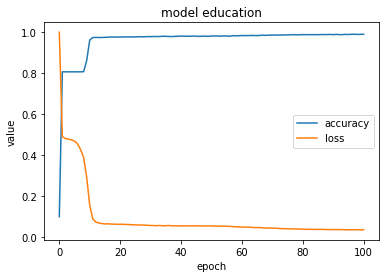

In [49]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model education')
plt.ylabel('value')
plt.xlabel('epoch')
plt.legend(['accuracy', 'loss'], loc='center right')
plt.show()

In [50]:
Y_pred = classifier.predict(X_test) # подаём на вход обученной НС тестовый набор данных
Y_pred = [ 1 if y>=0.5 else 0 for y in Y_pred ]

141/141 [==============================] - 0s 2ms/step


In [51]:
#у тест превратили в массив из цифр
y_test1 = y_test.to_numpy()

In [52]:
total = 0
correct = 0
wrong = 0
for i in range(len(Y_pred)):
 total=total+1
 if(y_test1[i] == Y_pred[i]):
  correct=correct+1
 else:
  wrong=wrong+1

print("Total " + str(total))
print("Correct " + str(correct))
print("Wrong " + str(wrong))

Total 4496
Correct 4457
Wrong 39
